## Project Description: Twitter US Airline Sentiment

### Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
### Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
 tweet_id
 airline_sentiment
 airline_sentiment_confidence
 negativereason
 negativereason_confidence
 airline
 airline_sentiment_gold
 name
 negativereason_gold
 retweet_count
 text
 tweet_coord
 tweet_created
 tweet_location
 user_timezone
### Objective:
To implement the techniques learnt as a part of the course.
Learning Outcomes:
 Basic understanding of text pre-processing.
 What to do after text pre-processing:
o Bag of words
o Tf-idf
 Build the classification model.
 Evaluate the Model.
### Steps and tasks:
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

### Importing libraries and functions

In [117]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    #review_text = BeautifulSoup(raw_review).get_text() 
    review_text = BeautifulSoup(raw_review, "html.parser").get_text() 
    #
    # 2. Remove numbers        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    text = re.sub(r'\d+', '', review_text)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

import re, string, unicodedata                          # Import Regex, string and unicodedata.                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
lemmatizer = WordNetLemmatizer()

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#Stopwords
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist)) 

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaya_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaya_000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaya_000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Importing the data

In [118]:
tweets = pd.read_csv("Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [119]:
data=tweets
data.shape
# Data has 14,640 rows and 15 columns

(14640, 15)

In [120]:
data.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], dtype=object)

In [121]:
data.isnull().sum(axis=0)
# The 2 columns in question doesnt have any null values

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### Data description

In [122]:
# This is airline data, text column is actual tweet which is in raw format having special characters, stop words, upper case letters etc. Airline_sentiment is 
# categorized into netral, positive and negative tweets which we need to predict through our model. There are 15 columns including 
# both above mentioned columns which suggests the sentiment in some other way, but as per problem statement I would go with 2 only.

### Understand of data-columns

In [123]:
drop_columns = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']
data = data.drop(drop_columns,axis=1)

In [124]:
data.shape

(14640, 2)

In [125]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [126]:
print (data['airline_sentiment'][14000] , data["text"][14000])

positive @AmericanAir Thanks for the reply, but a functioning plane four hours ago was the only way to do that. The staff was friendly, tho.


### Text pre-processing

In [127]:
#clean_review = review_to_words( train["text"][0] )
#print (clean_review)

# Get the number of reviews based on the dataframe column size
#num_reviews = train["text"].size
#
## Initialize an empty list to hold the clean reviews
#clean_train_reviews = []
#
## Loop over each review; create an index i that goes from 0 to the length
## of the movie review list 
#for i in range( 0, num_reviews ):
#    # Call our function for each one, and add the result to the list of
#    # clean reviews
#    clean_train_reviews.append( review_to_words( train["text"][i] ) )

In [128]:
# Removing the html tags
data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [129]:
# Removing numbers
data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [130]:
# Tokenization of data
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [131]:
# Normalizing the data
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica nt today must mean need take ano...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [132]:
## Cross check the data
data['text'][0]
data['text'][14000]

'americanair thank reply function plane four hours ago way staff friendly tho'

In [133]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
data["airline_sentiment"] = le.fit_transform(data["airline_sentiment"])
data.head()
#neutral=1
#positive=2
#negative=0

,airline_sentiment,text
0,1,virginamerica dhepburn say
1,2,virginamerica plus add commercials experience ...
2,1,virginamerica nt today must mean need take ano...
3,0,virginamerica really aggressive blast obnoxiou...
4,0,virginamerica really big bad thing


### Vectorization

#### 1. CountVectorizer Approach

In [134]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1000) 

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms 
# our training data into feature vectors. The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(data['text'])

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()
print (train_data_features.shape)

# Initialize a Random Forest classifier with 100 trees
#forest = RandomForestClassifier(verbose=2,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
#print ("Training the random forest...")
#forest = forest.fit( train_data_features, train["airline_sentiment"] )
# random forest performance through cross vaidation 
#print (forest)
#print (np.mean(cross_val_score(forest,train_data_features,train["airline_sentiment"],cv=10)))

(14640, 1000)


In [135]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

['aa', 'able', 'absolute', 'absolutely', 'accept', 'acceptable', 'access', 'accommodate', 'account', 'act', 'actual', 'actually', 'add', 'additional', 'address', 'advise', 'advisory', 'afternoon', 'agent', 'agents', 'ago', 'air', 'aircraft', 'airline', 'airlines', 'airplane', 'airport', 'airports', 'airways', 'alert', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'always', 'amaze', 'america', 'american', 'americanair', 'americanairlines', 'angry', 'announce', 'annoy', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apologize', 'apology', 'app', 'apparently', 'appear', 'appease', 'apply', 'appreciate', 'area', 'around', 'arrival', 'arrive', 'asap', 'ask', 'assign', 'assist', 'assistance', 'atl', 'atlanta', 'attempt', 'attendant', 'attendants', 'attitude', 'austin', 'auto', 'automate', 'available', 'avgeek', 'avoid', 'award', 'away', 'awesome', 'awful', 'baby', 'back', 'bad', 'badcustomerservice', 'badservice', 'bag', 'baggage', 'bank', 'base', 'bat

In [136]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

282 aa
121 able
22 absolute
30 absolutely
32 accept
23 acceptable
39 access
26 accommodate
80 account
18 act
21 actual
86 actually
128 add
17 additional
54 address
20 advise
24 advisory
30 afternoon
261 agent
155 agents
133 ago
143 air
32 aircraft
400 airline
156 airlines
23 airplane
345 airport
23 airports
87 airways
18 alert
88 allow
95 almost
18 alone
18 along
179 already
133 also
108 always
103 amaze
20 america
78 american
2961 americanair
29 americanairlines
20 angry
29 announce
21 annoy
273 another
190 answer
27 anymore
114 anyone
136 anything
28 anyway
27 anywhere
21 apologize
48 apology
109 app
38 apparently
22 appear
19 appease
30 apply
159 appreciate
30 area
63 around
31 arrival
155 arrive
42 asap
165 ask
19 assign
27 assist
53 assistance
38 atl
37 atlanta
28 attempt
90 attendant
57 attendants
29 attitude
35 austin
18 auto
40 automate
109 available
22 avgeek
18 avoid
52 award
74 away
123 awesome
60 awful
32 baby
528 back
186 bad
18 badcustomerservice
21 badservice
766 bag
227

223 think
20 tho
94 though
69 three
57 thru
105 thx
399 ticket
18 till
953 time
30 tire
32 tix
22 tmrw
426 today
68 together
308 tomorrow
163 tonight
37 top
23 total
30 totally
24 touch
31 track
45 train
37 transfer
328 travel
24 traveler
21 travelers
78 treat
230 trip
35 trouble
31 true
18 trueblue
23 trust
586 try
42 tsa
38 tuesday
55 turn
45 tv
121 tweet
68 twice
79 twitter
221 two
226 ua
18 ugh
23 uk
32 unable
88 unacceptable
20 unbelievable
122 understand
32 unfortunately
22 unhappy
23 unhelpful
4160 unite
46 unitedairlines
182 update
142 upgrade
41 upset
78 ur
706 us
50 usair
3051 usairways
26 usairwaysfail
282 use
23 useless
20 usually
79 vacation
88 vegas
110 via
21 video
25 view
30 virgin
523 virginamerica
21 visit
24 volume
104 voucher
28 vouchers
751 wait
24 walk
35 wall
334 want
25 warm
53 waste
58 watch
34 water
348 way
17 ways
308 weather
26 web
158 website
24 wed
18 wednesday
122 week
36 weekend
77 weeks
21 welcome
163 well
43 whole
86 wife
126 wifi
22 will
49 win
25 win

In [137]:
labels=data["airline_sentiment"]

# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(train_data_features, labels,test_size=0.3, random_state=42)

In [138]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(verbose=2,n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, train_data_features, labels, cv=10)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10

building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend Threading

0.7103142076502732


Frequency of unique values of the said array:
[[   0    1    2]
 [2814  884  694]]
Frequency of unique values of the result array:
[[   0    1    2]
 [3052  780  560]]
Confusion Matrix
[[2486  239   89]
 [ 368  433   83]
 [ 198  108  388]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


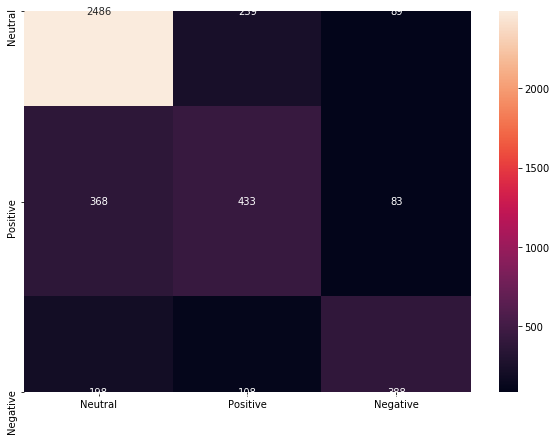

In [139]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)
#print(result)
#print(y_test)

# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
conf_mat = confusion_matrix(y_test, result)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(result, return_counts=True)
print("Frequency of unique values of the result array:")
print(np.asarray((unique_elements, counts_elements)))
print("Confusion Matrix")
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Neutral","Positive","Negative"]],
                  columns = [i for i in ["Neutral","Positive","Negative"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### 2. TF-IDF Vectorizer Approach

In [140]:
#print ("Creating the bag of words...\n")
## Initialize the "CountVectorizer" object, which is scikit-learn's
## bag of words tool.  
#vectorizer = TfidfVectorizer()
#
## fit_transform() does two functions: First, it fits the model
## and learns the vocabulary; second, it transforms our training data
## into feature vectors. The input to fit_transform should be a list of 
## strings.
#train_data_features = vectorizer.fit_transform(clean_train_reviews)
#
## Numpy arrays are easy to work with, so convert the result to an 
## array
#train_data_features = train_data_features.toarray()
#
#print (train_data_features.shape)
#
## Take a look at the words in the vocabulary
#vocab = vectorizer.get_feature_names()
#print (vocab)
#
## Sum up the counts of each vocabulary word
#dist = np.sum(train_data_features, axis=0)
#
## For each, print the vocabulary word and the number of times it 
## appears in the training set
#for tag, count in zip(vocab, dist):
#    print (count, tag)

## Initialize a Random Forest classifier with 100 trees
#forest = RandomForestClassifier(verbose=2,n_jobs=-1,n_estimators = 100) 
## Fit the forest to the training set, using the bag of words as 
## features and the sentiment labels as the response variable
##
## This may take a few minutes to run
#print ("Training the random forest...")
#forest = forest.fit( train_data_features, train["airline_sentiment"] )
## random forest performance through cross vaidation 
#print (forest)
#print (np.mean(cross_val_score(forest,train_data_features,train["airline_sentiment"],cv=10)))

In [141]:
# Using TfidfVectorizer to convert text data to numbers.
vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])
data_features = data_features.toarray()
data_features.shape

(14640, 1000)

In [142]:
labels=data["airline_sentiment"]
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features, labels,test_size=0.3, random_state=42)

In [143]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.710860655737705


Frequency of unique values of the said array:
[[   0    1    2]
 [2814  884  694]]
Frequency of unique values of the result array:
[[   0    1    2]
 [3277  639  476]]
Confusion Matrix
[[2580  173   61]
 [ 456  363   65]
 [ 241  103  350]]


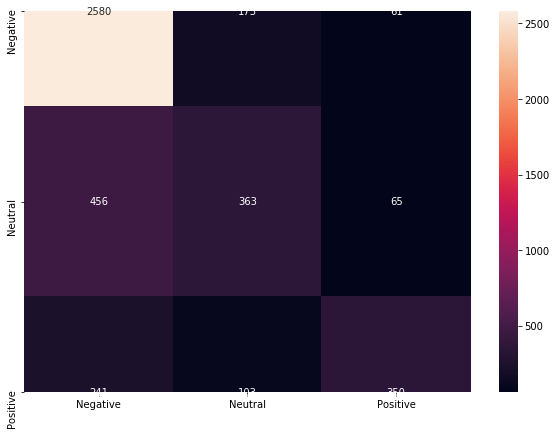

In [144]:
result = forest.predict(X_test)
conf_mat = confusion_matrix(y_test, result)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(result, return_counts=True)
print("Frequency of unique values of the result array:")
print(np.asarray((unique_elements, counts_elements)))
print("Confusion Matrix")
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Negative","Neutral","Positive"]],
                  columns = [i for i in ["Negative","Neutral","Positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [146]:
# Trying with Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
cl = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
cl = cl.fit(X_train, y_train)
print(np.mean(cross_val_score(cl, data_features, labels, cv=10)))
pred = cl.predict(X_test)

KeyboardInterrupt: 

### Summarization

- Used twitter dataset which has tweets in text format and their sentiment in either positive,negative or neutral.
- The goal was to build a model for text-classification/sentiment analysis.
- Pre-processed the data using variuos techniques and libraries.
    - Html tag removal - Initial data has noise, so removing html tags would reduced it
    - Tokenization - Tokenization is the task of taking a text or set of text and breaking it up into itsindividualtokens
    - Remove the numbers - Removed numbers as it carries less importance in text classification
    - Removal of Special Characters and Punctuations - Special characters and symbols are usually non-alphanumeric characters or even numeric characters, which add to the extra noise in unstructuredtext.Used simple regular expressions (regex) to remove them
    - Conversion to lowercase - To keep consistency in the data
    - Lemmatize or stemming - Converts inflections to root word or Lemma/idea of reducing different forms of a word to a coreroot
    - Stop words removal - Stopwords are common words that carry less important meaning thankeyword so removed it
    - Join the words - Done so that each row contains the data in text format
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, predicted the result for the test data.
- After that saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- With CountVectorizer we got an accuracy of 0.71, 
    - 0.7168715846994536
    - Frequency of unique values of the given array:
        - [[   0    1    2]
         [2814  884  694]]
    - Frequency of unique values of the result array:
        - [[   0    1    2]
         [3052  780  560]]
    - Confusion Matrix
        - [[2486  239   89]
         [ 368  433   83]
         [ 198  108  388]]
- With TF-IDF Vectorizer we got almost similar accuracy of 0.709
    - 0.7074453551912568
    - Frequency of unique values of the given array:
        - [[   0    1    2]
         [2814  884  694]]
    - Frequency of unique values of the result array:
        - [[   0    1    2]
         [3277  639  476]]
    - Confusion Matrix
        - [[2580  173   61]
         [ 456  363   65]
         [ 241  103  350]]
- Both the models has performed well, and if notice the count of sentiments in given/result array
and confusion matrix, it is clear that it can able to match the prediction well with some scope of improvement
- Also tried GradientBoosting but accuarcy remains same
- However, it can still increase the accuracy of our model by increasing the dataset